In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision import transforms

from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/dlfa assignments/assignment 1/data/images

Loading and visualising data

In [3]:
# Run
class LoadDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.images = os.listdir(image_dir)
        #self.masks=os.listdir(mask_dir)

    def __len__(self):
        return len(self.images)

    def __getitem1__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", ".bmp"))
        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("RGB"))
        return image, mask

    def __getitem__(self, index):#returns preprocessed image and mask ka ndarray
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", ".bmp"))
        
        image_pil = Image.open(img_path).convert("RGB")
        mask_pil = Image.open(mask_path).convert("RGB")
        
        # preprocessing 
        transform = torchvision.transforms.CenterCrop(572)
        image=transform(image_pil)
        mask_pil=transform(mask_pil)

        #convert to numpy arrays
        image=np.array(image)
        mask=np.array(mask_pil)

        image=self.transform(image)
        mask=self.convert_to_greyscale(mask,mask_pil)

        return image, mask #RGB image, and 8-channel mask 

    def transform(self, image):
      transform_ops = transforms.Compose([transforms.ToTensor()])
      return transform_ops(image)

    def convert_to_greyscale(self, image, m):#takes in RGB image and converts it to 3D tensor of 8 channels.
      list_of_greyscales=[]
      for class_idx in class_to_pixels.keys():
        tup=class_to_pixels[class_idx]
        greyscale_mask=np.zeros([572,572],dtype=np.uint8)
        for py in range(572):
          for px in range(572):
            r,g,b=m.getpixel((py,px))
            if (r,g,b)==tup:
              greyscale_mask[px][py]=1 #if I replace this by 255, I will get proper white image for that class.
        list_of_greyscales.append(greyscale_mask)
      final_mask = np.stack((list_of_greyscales[0],list_of_greyscales[1],list_of_greyscales[2],list_of_greyscales[3],list_of_greyscales[4],list_of_greyscales[5],list_of_greyscales[6],list_of_greyscales[7]))
      final_mask = np.int64(final_mask)
      final_mask_tensor = torch.from_numpy(final_mask)
      return final_mask_tensor


In [4]:
# Run
class_to_pixels={0:(0,0,0),1:(0,0,255),2:(0,255,0),3:(0,255,255),4:(255,0,0),5:(255,0,255),6:(255,255,0),7:(255,255,255)}
pixels_to_class={v: k for k, v in class_to_pixels.items()}

In [ ]:
#ignore below cells.

In [ ]:
images_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/images/'
masks_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/masks/'
data=LoadDataset(images_path, masks_path) #data is an object of class LoadDataset

In [ ]:
img1, mask1 = data.__getitem__(10)

In [ ]:
img1.shape

(572, 572, 3)

In [ ]:
mask1.shape

(572, 572, 3)

In [ ]:
import matplotlib.pyplot as plt
img = Image.fromarray(img1, 'RGB')
plt.imshow(img)

NameError: ignored

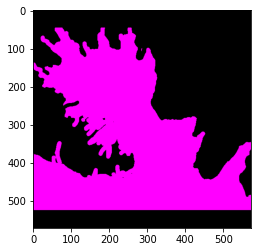

In [ ]:
msk = Image.fromarray(mask1, 'RGB')
plt.imshow(msk)

In [ ]:
print(len(data.images))

1525


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
m = Image.open('/content/drive/MyDrive/dlfa assignments/assignment 1/data/masks/d_r_103_.bmp').convert("RGB") 
transform = torchvision.transforms.CenterCrop((572,572))
m = transform(m)
mask = np.array(m)

list_of_masks=[] #list of ndarray

pixels=m.load()

In [ ]:
mask.shape

(572, 572, 3)

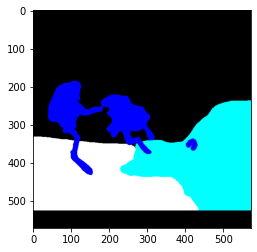

In [ ]:
msk = Image.fromarray(mask, 'RGB')
plt.imshow(msk)

In [ ]:
pixel_values = list(m.getdata())

In [ ]:
class_to_pixels={0:(0,0,0),1:(0,0,255),2:(0,255,0),3:(0,255,255),4:(255,0,0),5:(255,0,255),6:(255,255,0),7:(255,255,255)}
pixels_to_class={v: k for k, v in class_to_pixels.items()}

Experimenting with preprocessing: 

In [ ]:
unique_pixel_values=list(set(pixel_values))

In [ ]:
unique_pixel_values

[(0, 255, 255), (0, 0, 255), (0, 0, 0), (255, 255, 255)]

In [ ]:
a,b,c=unique_pixel_values[0]

In [ ]:
c

255

In [ ]:
mask.shape

(572, 572, 3)

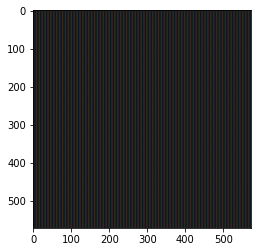

In [ ]:
for tup in unique_pixel_values:
  r1,g1,b1=tup
  r2, g2, b2 = 0,0,0 #value for that class
  new_image=np.full((572,572,3), 255)
  red, green, blue = mask[:,:,0], mask[:,:,1], mask[:,:,2]
  mask1 = (red == r1) & (green == g1) & (blue == b1)
  new_image[mask1] = (r2, g2, b2)
  msk = Image.fromarray(new_image, 'RGB')
  plt.imshow(msk)

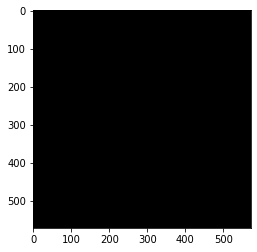

In [ ]:
black = np.zeros([572,572,3],dtype=np.uint8)
#black.fill(255) 
msk = Image.fromarray(black).convert("RGB")
plt.imshow(msk)

In [ ]:
height

572

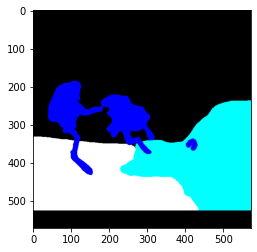

In [ ]:
msk = Image.fromarray(mask, 'RGB')
plt.imshow(msk)

In [ ]:
m.size

(572, 572)

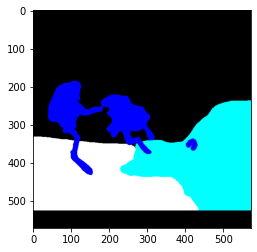

In [ ]:
new_img = np.zeros([572,572,3],dtype=np.uint8)
width, height = m.size
for px in range(width):
  for py in range(height):
    r,g,b= m.getpixel((py,px)) #dk why this is happening. i made it py,px from px,py.
    new_img[px][py][0]=np.uint8(r)
    new_img[px][py][1]=np.uint8(g)
    new_img[px][py][2]=np.uint8(b)

msk = Image.fromarray(new_img).convert("RGB")
plt.imshow(msk)

In [ ]:
list_of_greyscales=[]
for class_idx in class_to_pixels.keys():
  tup=class_to_pixels[class_idx]
  greyscale_mask=np.zeros([572,572],dtype=np.uint8)
  for py in range(572):
    for px in range(572):
      r,g,b=m.getpixel((py,px))
      if (r,g,b)==tup:
        greyscale_mask[px][py]=1 #if I replace this by 255, I will get proper white image for that class.
  list_of_greyscales.append(greyscale_mask)
final_mask = np.stack((list_of_greyscales[0],list_of_greyscales[1],list_of_greyscales[2],list_of_greyscales[3],list_of_greyscales[4],list_of_greyscales[5],list_of_greyscales[6],list_of_greyscales[7]))

In [ ]:
list_of_greyscales[0].shape

(572, 572)

In [ ]:
final_mask = np.stack((list_of_greyscales[0],list_of_greyscales[1],list_of_greyscales[2],list_of_greyscales[3],list_of_greyscales[4],list_of_greyscales[5],list_of_greyscales[6],list_of_greyscales[7]))

In [ ]:
final_mask.shape

(8, 572, 572)

In [ ]:
msk = Image.fromarray(list_of_greyscales[0], "L")

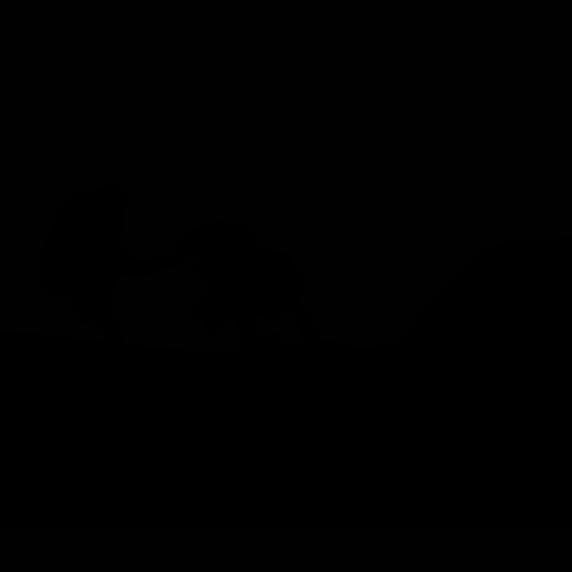

In [ ]:
msk

In [ ]:
tup=unique_pixel_values[0]
new_img = np.zeros([572,572],dtype=np.uint8) #create only one channel, since greyscale image.
width, height=m.size
for py in range(height):
  for px in range(width):
    r,g,b=m.getpixel((py,px))
    if (r,g,b)==tup:
      new_img[px][py]=1

msk = Image.fromarray(new_img, "L")
#plt.imshow(msk)
#msk.show()

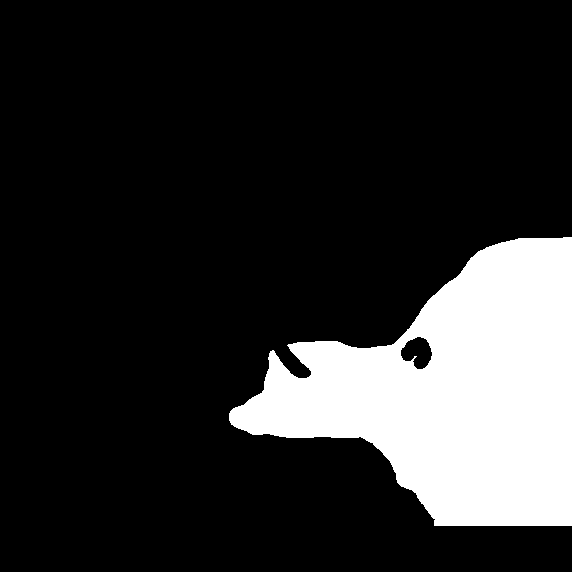

In [ ]:
msk #yay, greyscale obtained

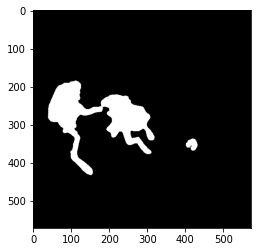

In [ ]:
tup=unique_pixel_values[1]
new_img = np.zeros([572,572,3],dtype=np.uint8)
width, height=m.size
for py in range(height):
  for px in range(width):
    r,g,b=m.getpixel((py,px))
    if (r,g,b)==tup:
      new_img[px,py,:]=np.uint8(255)

msk = Image.fromarray(new_img).convert("RGB")
plt.imshow(msk)

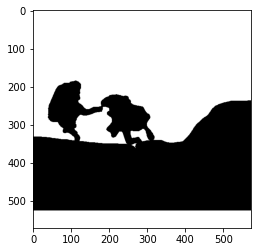

In [ ]:
tup=unique_pixel_values[2]
new_img = np.zeros([572,572,3],dtype=np.uint8)
width, height=m.size
for py in range(height):
  for px in range(width):
    r,g,b=m.getpixel((py,px))
    if (r,g,b)==tup:
      new_img[px,py,:]=np.uint8(255)

msk = Image.fromarray(new_img).convert("RGB")
plt.imshow(msk)

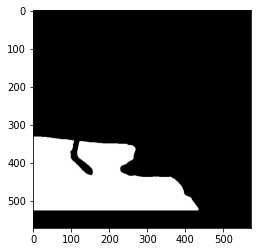

In [ ]:
tup=unique_pixel_values[3]
new_img = np.zeros([572,572,3],dtype=np.uint8)
width, height=m.size
for py in range(height):
  for px in range(width):
    r,g,b=m.getpixel((py,px))
    if (r,g,b)==tup:
      new_img[px,py,:]=np.uint8(255)

msk = Image.fromarray(new_img).convert("RGB")
plt.imshow(msk)

dividing into train and validation data (8:2 ratio)

In [ ]:
#ignore
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

In [6]:
#ignore
images_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/images/'
masks_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/masks/'

dataset=LoadDataset(images_path, masks_path) #data is an object of class LoadDataset

In [7]:
#ignore
n=len(dataset)
val_percent=0.2

n_val = int(n * val_percent)
n_train = n - n_val
train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(0))

# Creating data loaders
train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
val_loader = DataLoader(val_set, shuffle=False, drop_last=True, batch_size=32)

Run below cells:

In [5]:
# sub-parts of the U-Net model. Run this.

import torch
import torch.nn as nn
import torch.nn.functional as F


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

In [6]:
# run this
import torch.nn.functional as F
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256)
        self.up2 = up(512, 128)
        self.up3 = up(256, 64)
        self.up4 = up(128, 64)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return F.sigmoid(x)

In [ ]:
#ignore

def plot_net_predictions(imgs, true_masks, masks_pred, batch_size):
    
    fig, ax = plt.subplots(3, batch_size, figsize=(20, 15))
    
    for i in range(batch_size):
        
        img  = np.transpose(imgs[i].squeeze().cpu().detach().numpy(), (1,2,0))
        mask_pred = masks_pred[i].cpu().detach().numpy()
        mask_true = true_masks[i].cpu().detach().numpy()
    
        ax[0,i].imshow(img)
        ax[1,i].imshow(mask_pred)
        ax[1,i].set_title('Predicted')
        ax[2,i].imshow(mask_true)
        ax[2,i].set_title('Ground truth')
        
    return fig

In [ ]:
#ignore

from sklearn.metrics import confusion_matrix

def compute_IoU(cm):
    '''
    Adapted from:
        https://github.com/davidtvs/PyTorch-ENet/blob/master/metric/iou.py
        https://github.com/tensorflow/tensorflow/blob/v2.3.0/tensorflow/python/keras/metrics.py#L2716-L2844
    '''
    
    sum_over_row = cm.sum(axis=0)
    sum_over_col = cm.sum(axis=1)
    true_positives = np.diag(cm)

    # sum_over_row + sum_over_col = 2 * true_positives + false_positives + false_negatives.
    denominator = sum_over_row + sum_over_col - true_positives
    
    iou = true_positives / denominator
    
    return iou, np.nanmean(iou) 

def eval_net_loader(net, val_loader, n_classes, device='cpu'):
    
    net.eval()
    labels = np.arange(n_classes)
    cm = np.zeros((n_classes,n_classes))
      
    for i, sample_batch in enumerate(val_loader):
            imgs = sample_batch['image']
            true_masks = sample_batch['mask']
            
            imgs = imgs.to(device)
            true_masks = true_masks.to(device)

            outputs = net(imgs)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            
            for j in range(len(true_masks)): 
                true = true_masks[j].cpu().detach().numpy().flatten()
                pred = preds[j].cpu().detach().numpy().flatten()
                cm += confusion_matrix(true, pred, labels=labels)
    
    class_iou, mean_iou = compute_IoU(cm)
    
    return class_iou, mean_iou

def IoU(mask_true, mask_pred, n_classes=2):
        
        labels = np.arange(n_classes)
        cm = confusion_matrix(mask_true.flatten(), mask_pred.flatten(), labels=labels)
        
        return compute_IoU(cm)

In [ ]:
#ignore
import sys
import os
from optparse import OptionParser
import numpy as np

import torch
import torch.nn as nn
from torch import optim
from tensorboardX import SummaryWriter

In [ ]:
#ignore   
    dir_data = '/content/'
    dir_checkpoint = f'/content/'
    dir_summary = f'/content/'
    params = {'batch_size': 32, 'shuffle': True, 'num_workers': 1}

    from pathlib import Path
    import shutil

    def make_checkpoint_dir(dir_checkpoint):
        
        path = Path(dir_checkpoint)
        # remove folder if it exists
        if path.exists():
            shutil.rmtree(path)
        path.mkdir(parents=True, exist_ok=False)

    make_checkpoint_dir(dir_checkpoint)
    writer = SummaryWriter(dir_summary)



    
    
    #val_ratio=0.1
    #train_loader, val_loader =  make_dataloaders(dir_data, val_ratio, params)
    
    net = UNet(n_channels=3, n_classes=3)

     |████████████████████████████████| 125 kB 4.2 MB/s 


In [ ]:
#ignore


def train_epoch(epoch,train_loader,criterion,optimizer,batch_size,scheduler):
    
    net.train()
    epoch_loss = 0
    
    for i, sample_batch in enumerate(train_loader):

        imgs = sample_batch['image']
        true_masks = sample_batch['mask']

        outputs = net(imgs)
        probs = torch.softmax(outputs, dim=1)
        masks_pred = torch.argmax(probs, dim=1)

        loss = criterion(outputs, true_masks)
        epoch_loss += loss.item()

        print(f'epoch = {epoch+1:d}, iteration = {i:d}/{len(train_loader):d}, loss = {loss.item():.5f}')
        # save to summary
        if i%100==0:
            writer.add_scalar('train_loss_iter', 
                                  loss.item(), 
                                  i + len(train_loader) * epoch)
            writer.add_figure('predictions vs. actuals',   
                                  plot_net_predictions(imgs, true_masks, masks_pred, batch_size),    
                                  global_step = i + len(train_loader) * epoch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch finished ! Loss: {epoch_loss/i:.2f}, lr:{scheduler.get_lr()}')

        
def validate_epoch(epoch,train_loader,val_loader,device):
    
    class_iou, mean_iou = eval_net_loader(net, val_loader, 3, device)
    print('Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}') 
    # save to summary
    writer.add_scalar('mean_iou', mean_iou, len(train_loader) * (epoch+1))
    
    return mean_iou
 

def train_net(train_loader, val_loader, net, device, epochs=5, batch_size=1, lr=0.1, save_cp=True):
    
#     params = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4}
#     train_loader, val_loader =  make_dataloaders(dir_data, val_ratio, params)

    print(f'''
    Starting training:
        Epochs: {epochs}
        Batch size: {batch_size}
        Learning rate: {lr}
        Training size: {n_train}
        Validation size: {n_val}
        Checkpoints: {str(save_cp)}
        Device: {str(device)}
    ''')
          
    optimizer = optim.SGD(net. parameters(),lr=lr, momentum=0.9, weight_decay=0.0005)
    # multiply learning rate by 0.1 after 30% of epochs
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=int(0.3*epochs), gamma=0.1)
    
    criterion = nn.CrossEntropyLoss()
    # weighted cross entropy loss
#     criterion = nn.CrossEntropyLoss(weight=torch.tensor([0.3, 8.2, 1.0]).cuda()) 
    
    best_precision = 0
    for epoch in range(epochs):
          
        print('Starting epoch {}/{}.'.format(epoch + 1, epochs))
        train_epoch(epoch,train_loader,criterion,optimizer,batch_size,scheduler)
        precision = validate_epoch(epoch,train_loader,val_loader,device)
        scheduler.step()

        if save_cp and (precision>best_precision):
            state_dict = net.state_dict()
            if device=="cuda":
                state_dict = net.module.state_dict()
            torch.save(state_dict, dir_checkpoint+f'CP{epoch + 1}.pth')
            print('Checkpoint {} saved !'.format(epoch + 1))
            best_precision = precision
    
    writer.close()



 

In [ ]:
#ignore

    

    try:
        train_net(train_loader, val_loader, net, device, epochs=50, batch_size=32, lr=0.1)
        
    except KeyboardInterrupt:
        torch.save(net.state_dict(), 'INTERRUPTED.pth')
        print('Saved interrupt')
        try:
            sys.exit(0)
        except SystemExit:
            os._exit(0)

## Trying out https://www.kaggle.com/code/gokulkarthik/image-segmentation-with-unet-pytorch code

In [ ]:
#ignore this block
class UNet(nn.Module):
    
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.num_classes = num_classes
        self.contracting_11 = self.conv_block(in_channels=3, out_channels=64)
        self.contracting_12 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_21 = self.conv_block(in_channels=64, out_channels=128)
        self.contracting_22 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_31 = self.conv_block(in_channels=128, out_channels=256)
        self.contracting_32 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_41 = self.conv_block(in_channels=256, out_channels=512)
        self.contracting_42 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.middle = self.conv_block(in_channels=512, out_channels=1024)
        self.expansive_11 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_12 = self.conv_block(in_channels=1024, out_channels=512)
        self.expansive_21 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_22 = self.conv_block(in_channels=512, out_channels=256)
        self.expansive_31 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_32 = self.conv_block(in_channels=256, out_channels=128)
        self.expansive_41 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_42 = self.conv_block(in_channels=128, out_channels=64)
        self.output = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=3, stride=1, padding=1)
        
    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels),
                                    nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels))
        return block
    
    def forward(self, X):
        contracting_11_out = self.contracting_11(X) # [-1, 64, 256, 256]
        contracting_12_out = self.contracting_12(contracting_11_out) # [-1, 64, 128, 128]
        contracting_21_out = self.contracting_21(contracting_12_out) # [-1, 128, 128, 128]
        contracting_22_out = self.contracting_22(contracting_21_out) # [-1, 128, 64, 64]
        contracting_31_out = self.contracting_31(contracting_22_out) # [-1, 256, 64, 64]
        contracting_32_out = self.contracting_32(contracting_31_out) # [-1, 256, 32, 32]
        contracting_41_out = self.contracting_41(contracting_32_out) # [-1, 512, 32, 32]
        contracting_42_out = self.contracting_42(contracting_41_out) # [-1, 512, 16, 16]
        middle_out = self.middle(contracting_42_out) # [-1, 1024, 16, 16]
        expansive_11_out = self.expansive_11(middle_out) # [-1, 512, 32, 32]
        expansive_12_out = self.expansive_12(torch.cat((expansive_11_out, contracting_41_out), dim=1)) # [-1, 1024, 32, 32] -> [-1, 512, 32, 32]
        expansive_21_out = self.expansive_21(expansive_12_out) # [-1, 256, 64, 64]
        expansive_22_out = self.expansive_22(torch.cat((expansive_21_out, contracting_31_out), dim=1)) # [-1, 512, 64, 64] -> [-1, 256, 64, 64]
        expansive_31_out = self.expansive_31(expansive_22_out) # [-1, 128, 128, 128]
        expansive_32_out = self.expansive_32(torch.cat((expansive_31_out, contracting_21_out), dim=1)) # [-1, 256, 128, 128] -> [-1, 128, 128, 128]
        expansive_41_out = self.expansive_41(expansive_32_out) # [-1, 64, 256, 256]
        expansive_42_out = self.expansive_42(torch.cat((expansive_41_out, contracting_11_out), dim=1)) # [-1, 128, 256, 256] -> [-1, 64, 256, 256]
        output_out = self.output(expansive_42_out) # [-1, num_classes, 256, 256]
        return output_out

Run below cells:

In [7]:
num_classes=8

In [13]:
model = UNet(3,8)

In [8]:
images_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/images/'
masks_path='/content/drive/MyDrive/dlfa assignments/assignment 1/data/masks/'

dataset=LoadDataset(images_path, masks_path) #data is an object of class LoadDataset

In [9]:
import math

In [10]:
n=len(dataset)
val_percent=0.2

n_val = math.floor(n * val_percent)
n_train = n - n_val
train_set, val_set = random_split(dataset, [n_train, n_val]) #, generator=torch.Generator().manual_seed(0)

# Creating data loaders
data_loader=DataLoader(dataset, batch_size=4)
train_loader = DataLoader(train_set, batch_size=4) #data_loader is basically train_loader #i wrote dataset instead of train_set
val_loader = DataLoader(val_set, batch_size=4)

In [15]:
# ignore
X, Y = iter(data_loader).next()
print(type(X))
print(type(Y))

KeyboardInterrupt: ignored

In [ ]:
X.shape

torch.Size([32, 3, 572, 572])

In [ ]:
Y.shape

torch.Size([32, 8, 572, 572])

In [16]:
#data_loader = DataLoader(dataset, batch_size=4)
print(len(dataset), len(data_loader), len(train_loader), len(val_loader))

#X, Y = iter(data_loader).next()
#print(type(X))
#print(type(Y))

#works, because 49*32=1568.

1525 382 305 77


In [14]:
epochs = 3
lr = 0.01
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [15]:
step_losses = []
epoch_losses = []

train_losses=[]
train_accu=[]

val_losses=[]
val_accu=[]

count=0
for epoch in tqdm(range(1)):
    epoch_loss = 0
    for X, Y in tqdm(train_loader, total=len(train_loader), leave=False):
        optimizer.zero_grad()
        Y_pred = model(X)
        loss = criterion(Y_pred, Y.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        step_losses.append(loss.item())
        count=count+1
        if count==50:
          break
    #epoch_losses.append(epoch_loss/len(data_loader))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/382 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


KeyboardInterrupt: ignored